# Experiments on Dai's Framework

In this notebook we study a set of extensions to a basic stopping algorithm by Dai et al.
We analyse the performance and quality according to a set of metrics defined below and we compare with the basic Dai's algorithm.


In [1]:
from pomdp_extensions import *

## Metrics: 
 - **Classification cost** Each vote has a cost (assumed to be 1), and we compute the total cost for classifying all items
 - **Weighted classificaiton error = (fpc * FP + fnc * FN + ucc*UC)/N** FP= false positives, FB = false negatives, UC= items left unclassified, N= total number of items on which we reached a decision (or a decision to leave them unclassified), fpc= false positive cost, fnc = false negative cost, ucc=unclassified cost. Notice that loss here is INDEPENDENT of the cost
 - **Precision and Recall, F1, Fbeta**
 
## Baselines
- We compare with other baselines, which are:
 - fixed number of votes
 - two and break the tie
 - stop after S consecutive same votes
 - stop when difference among two classes greater than X
 

## Extensions to Dai's framework:
We consider the following extensions

- Varying the cost for giving the wrong answer (this means varying fpc and fnc)
- Dai divides the continuous space of (difficulty, true label) in (11*2)+1 discrete classes, we explore what happens as we reduce or increase this number
- We add one more action, which is leave the items unclassified.
- We experiment in sceanrios with varying error rates distribution for the workers
- We use workers confusion matrix for error rates as opposed to "plain" error rates that are independent of the true label
- we explore the above over a variety of real and simulated datasets
- We experiment with balanced and unbalanced datasets
- We experiment with adding a prior based on an estimation of the dataset balance
- (Future: see what changes for multi predicate)
- **Estimate after ('after' in plots) means that workers error rate $\gamma$ estimation using EM starts after submitting the first answer, otherwise we try estimating $\gamma$ after collecting 2 votes over an item** We compare with Dai's who i) they take one vote per item at each iteration, ii) they re-estimate error rates ONLY after doing the transitions. We want to see what happens if we do that before.


### 1. Try POMDP models with different rewards

In this set of experiments we consider how POMDP performs with respect to the baselines, on our set of test datasets, and we vary the two parameters, **fnc** and **fpc**.

Also, for all experiments, we test the difference between conputing error rates (running EM) before or after updating the POMDP

## Experiment settings
### POMDP definition: 
 - States: 23
 - Actions: 3 = {RequestVote, SubmitFalse, SubmitTrue}
 
 Transitions: 
 - $T(S_i, Action=RequestVote, S_i) = 1$
 - $T(S_i, Action=SubmitTrue, S_{terminal}) = 1$
 - $T(S_i, Action=SubmitFalse, S_{terminal}) = 1$
 
 Observations probabilities:
 - $O(S_i, RequestVote, CorrectAnswer) = Acc$
 - $O(S_i, RequestVote, IncorrectAnswer) = 1 - Acc$
 
 Worker Accuracy Formula:
 - $Acc(d, \gamma) = \frac{1}{2} (1 + (1 - d)^{\gamma}) $
 
 Rewards:
 - Request vote: -1
 - Correct answer: 0
 - Beta = fnc/fpc 
 
 

Workers:
 - Binary classification
 - 1000 items
 - average number of votes per worker: (5, 10, 20)
 - Error rate distribution: $\gamma \sim Normal(1, 0.2)$
 - Accuracy ±75%
 
Variations of the experiment:
 - fpc = fnc = {-1, -10, -20, -50, -500, -1000}
 - same for fpc, but we make fnc = fpc * 10, and fnc = fpc * 100
 - as the error rate distribution varies

 

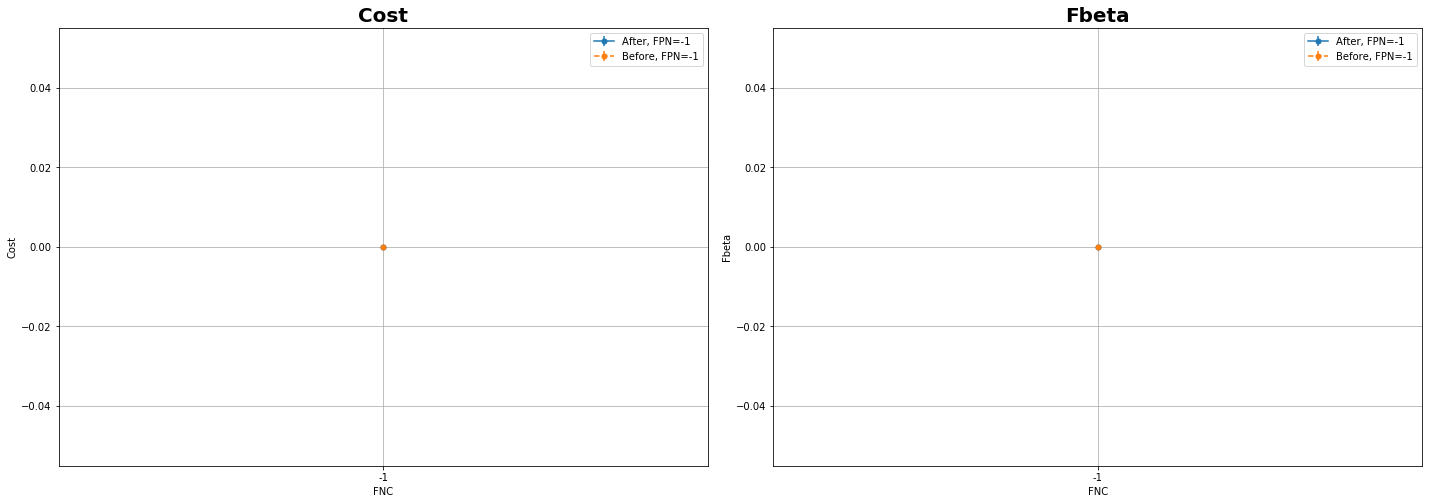

In [7]:
items_num = 1000
positive_percentage = 0.5
item_difficulty = 0.5
workers_num = 100
avg_workers_error_rate = 1
dist_name = "Normal" # possible values: Normal, Beta
dist_mean = 1
dist_std = 0.2
states_num = 23
fncs = [-1, -5, -10, -500]
fpcs = [-1, -5, -10, -500]
moment_error_estimations = [False, True] # EM estimate worker error rates befefore and after?
# path to policies folder
policy_path = "./dai_pomdp/ModelLearning/Policies/"
output_file = "./results/base.csv"

def get_policy_name(items_num, fnc, fpc):
    return f'wrong-cost-fnc{fnc}-fpc{fpc}.policy'

columns_to_print = ['cost', 'fbeta']

run_base_case(items_num, positive_percentage, item_difficulty, workers_num, avg_workers_error_rate,
                  dist_name, dist_mean, dist_std, states_num, policy_path, output_file, moment_error_estimations,
                  fncs, fpcs, get_policy_name, columns_to_print)


## 2. Test with different number of states in the model of MDP

POMDP definition: 
 - States #: {5,9,13,17}
     (difficulty, true_label)
    - 5:  (0,0)(1,0)(0,1)(1,1)(T)
    - 9:  (0,0)(0.33,0)(0.66,0)(1,0)(0,1)(0.33,1)(0.66,1)(1,1)(T)
    - 13: (0,0)(0.2,0)(0.4,0)(0.6,0)(0.8,0)(1,0)(0,1)(0.2,1)(0.4,1)(0.6,1)(0.8,1)(1,1)(T)
    - 17: (0,0)(0.15,0)(0.3,0)(0.45,0)(0.6,0)(0.75,0)(0.9,0)(1,0)(0,1)(0.15,1)(0.3,1)(0.45,1)(0.6,1)(0.75,1)(0.9,1)(1,1)(T)
    
    
 - Actions: 4 = {RequestVote, SubmitFalse, SubmitTrue}
 
 Transitions: 
 - $T(S_i, Action=RequestVote, S_i) = 1$
 - $T(S_i, Action=SubmitTrue, S_{terminal}) = 1$
 - $T(S_i, Action=SubmitFalse, S_{terminal}) = 1$
 
 Observations probabilities:
 - $O(S_i, RequestVote, CorrectAnswer) = Acc$
 - $O(S_i, RequestVote, IncorrectAnswer) = 1 - Acc$
 
 Worker Accuracy Formula:
 - $Acc(d, \gamma) = \frac{1}{2} (1 + (1 - d)^{\gamma}) $
 
 Rewards:
 - Request vote: -1
 - Correct answer: 0
 - Wrong answer: -500

Workers:
 - Amount: 100
 - Error rate distribution: $\gamma \sim Normal(1, 0.2)$




Estimation After?: True


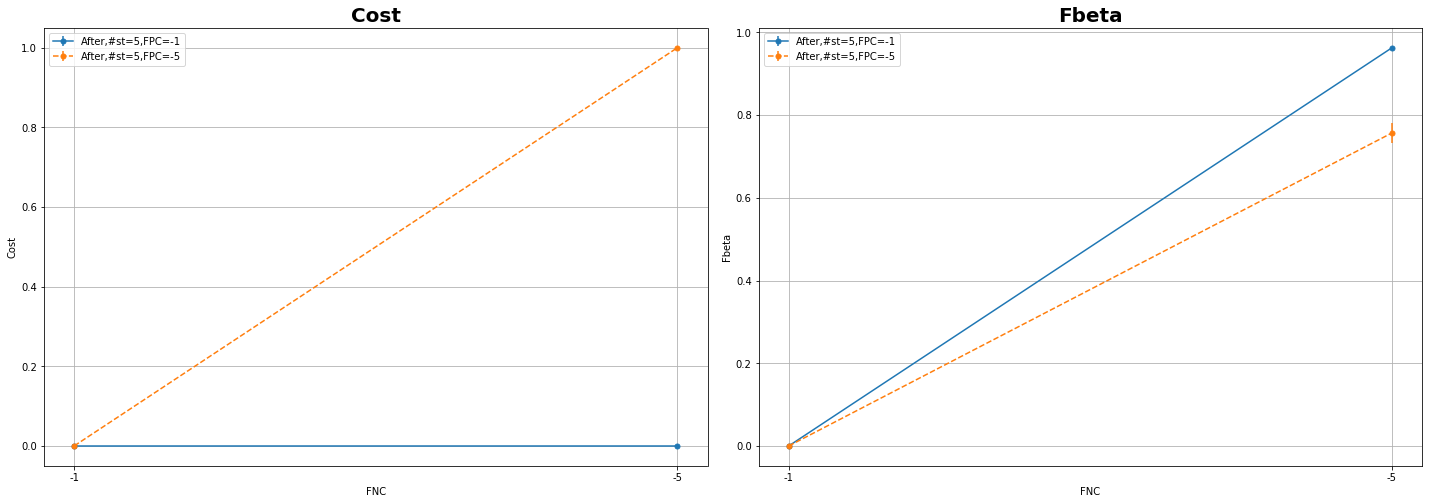



Estimation After?: False


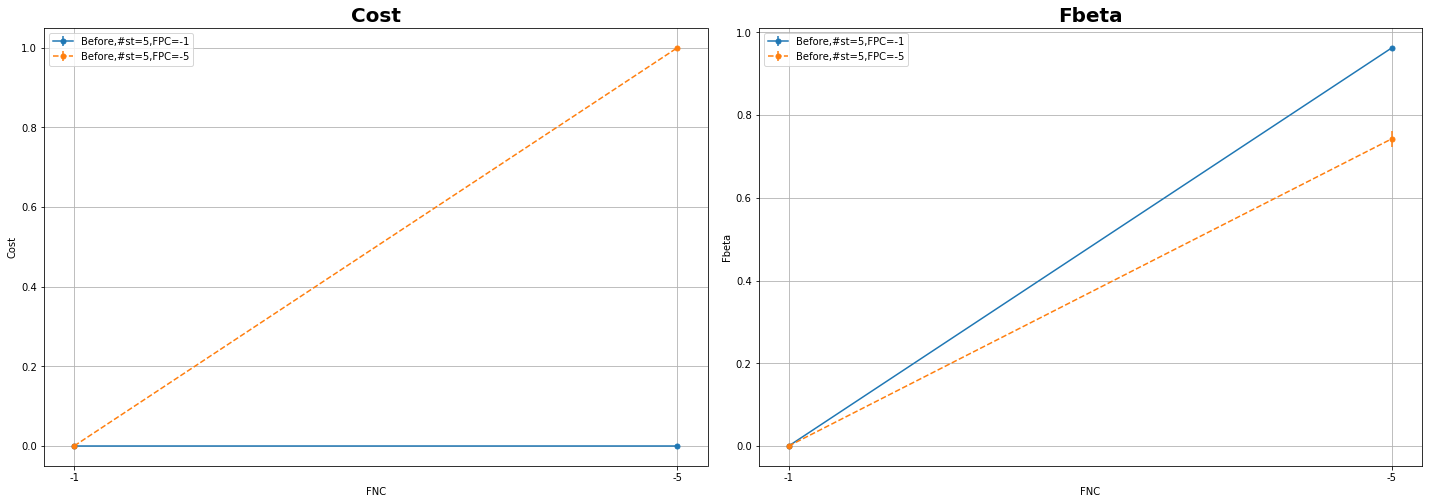

In [6]:
items_num = 1000
positive_percentage = 0.5
item_difficulty = 0.5
workers_num = 100
avg_workers_error_rate = 1
dist_name = "Normal" # possible values: Normal, Beta
dist_mean = 1
dist_std = 0.2
states_num = 23
fncs = [-1, -5, -10, -500]
fpcs = [-1, -5, -10, -500]
moment_error_estimations = [False, True] # EM estimate worker error rates befefore and after?

states_nums = [5,9,13,17,43,203]
states_diffs = [[0,1], #5 states
         [0, 0.33, 0.66, 1], #9 states
         [0, 0.2, 0.4, 0.6, 0.8, 1], # 13 states
         [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1], #17 states
         np.arange(0, 1.05, .05), #43
         np.arange(0, 1.01, .01) # 203
        ]

# path to policies folder
policy_path = "./dai_pomdp/ModelLearning/Policies/"
output_file = "./results/num_states.csv"

columns_to_print = ['cost', 'fbeta']

def get_policy_name(states_num, fnc, fpc):
    return f'vc-{states_num}states-fnc{fnc}-fpc{fpc}.policy'

run_vary_num_states(items_num, positive_percentage, item_difficulty, workers_num, avg_workers_error_rate,
                  dist_name, dist_mean, dist_std, states_nums, states_diffs, policy_path, output_file,
                moment_error_estimations, fncs, fpcs, get_policy_name, columns_to_print)